# **Data science 2- Homework 2 solution**
***

In [1]:
# imports
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## **1. Load the "Individual household electric power consumption" dataset** 
***

First, we will load the dataset as advised in the following link of [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption):

In [2]:
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets   
# variable information 
display(individual_household_electric_power_consumption.variables)

C:\Users\baraky\PycharmProjects\Data_science_lab2_homework2_solution\.venv\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,name,role,type,demographic,description,units,missing_values
0,Date,Feature,Date,None,None,None,no
1,Time,Feature,Categorical,None,None,None,no
2,Global_active_power,Feature,Continuous,None,None,None,no
3,Global_reactive_power,Feature,Continuous,None,None,None,no
4,Voltage,Feature,Continuous,None,None,None,no
5,Global_intensity,Feature,Continuous,None,None,None,no
6,Sub_metering_1,Feature,Continuous,None,None,None,no
7,Sub_metering_2,Feature,Continuous,None,None,None,no
8,Sub_metering_3,Feature,Continuous,None,None,None,no


We can see the variables of the dataset. This dataset contains 9 features in order to predict the individual household electric power consumption. We can see features like Date, time, active and reactive power, voltage, etc...
The measurements were taken from one household with a one-minute sampling rate over a period of almost 4 years. 
(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt/hour) in the household by electrical equipment not measured in sub-meters 1, 2 and 3.


In [3]:
X.head()    # let's observe the features

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


we can see That Date has a date format of DD/MM/YYYY, a timestamp of HH:MM:SS  and 3 sub-meters results that allows the landlord to bill each tenant separately.
Now let's observe the original dataset:

In [17]:
display(individual_household_electric_power_consumption.data.original)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,43.100000
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,15.766667
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,15.733333
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,15.566667


TypeError: 'Index' object is not callable

Ok, so we can see that the given function divides our data to features and targets, so let's observe the targets:

In [5]:
display(individual_household_electric_power_consumption.data.targets)

None

we can see that we have no target variables, so as described in the dataset documentation we need to calculate the target using the above formula: (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3). However, let's first check if there are missing values:

In [6]:
print(f"{individual_household_electric_power_consumption.data.original.isna().sum().sum() / individual_household_electric_power_consumption.data.original.shape[0] * 100}% of the data is missing")

1.2518437457686005% of the data is missing


we can see that 1.25% of the data is missing, and we will need to think of how to handle that. So, first let's see where we have missing data:

In [7]:
display(individual_household_electric_power_consumption.data.original.isna().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
display(individual_household_electric_power_consumption.data.original[individual_household_electric_power_consumption.data.original.isna().any(axis=1)])

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


we can see that missing values are marked as '?'. First, let's replace them with Nan:

In [9]:
individual_household_electric_power_consumption.data.original.replace('?', np.nan, inplace=True)
display(individual_household_electric_power_consumption.data.original[individual_household_electric_power_consumption.data.original.isna().any(axis=1)])

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,28/9/2010,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,28/9/2010,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,28/9/2010,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def calculate_active_power_consumption(row):
    if pd.isna(row['Global_active_power']) or any([pd.isna(row[f'Sub_metering_{i}']) for i in range(1,3,1)]):
        return np.nan
    else:
        return float(row['Global_active_power']) * 1000 / 60 - float(row['Sub_metering_1']) - float(row['Sub_metering_2']) - float(row['Sub_metering_3'])

In [18]:
# calculate the active power assumption
original_df = individual_household_electric_power_consumption.data.original
original_df_target_with_missing_values = original_df
original_df_target_with_missing_values["active_power_consumption"] = original_df_target_with_missing_values.apply(calculate_active_power_consumption, axis=1)
display(original_df_target_with_missing_values)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,43.100000
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,15.766667
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,15.733333
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,15.566667


TypeError: 'Index' object is not callable

In [19]:
print(original_df.columns())


TypeError: 'Index' object is not callable

For sanity check, let's check that the missing rows remains the same (same number of rows filled with Nan values:

In [12]:
display(original_df_target_with_missing_values[original_df_target_with_missing_values.isna().any(axis=1)])

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_power_consumption
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,28/9/2010,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,28/9/2010,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,28/9/2010,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the function did exactly what we asked her to :)

## 2. **EDA**
***

### **Visualize time series trends**
*** 

We will first view the time series trends

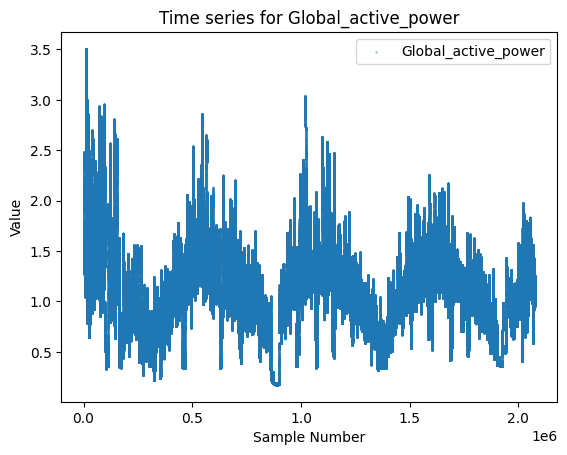

C:\Users\baraky\PycharmProjects\Data_science_lab2_homework2_solution\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


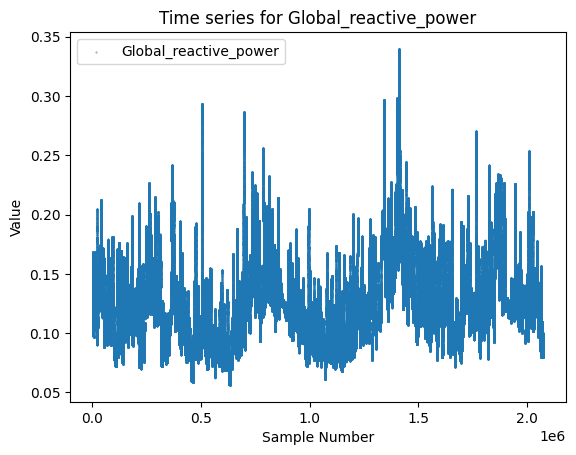

C:\Users\baraky\PycharmProjects\Data_science_lab2_homework2_solution\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


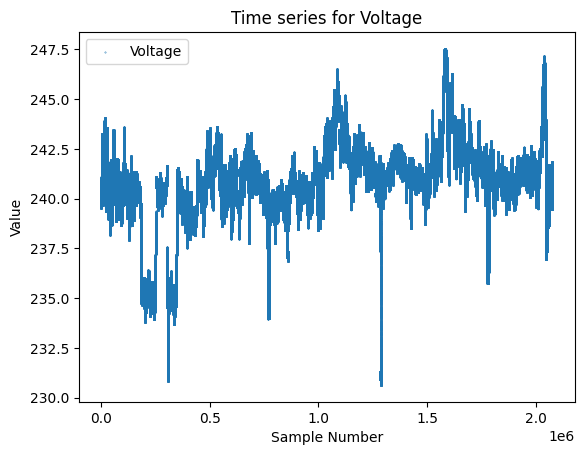

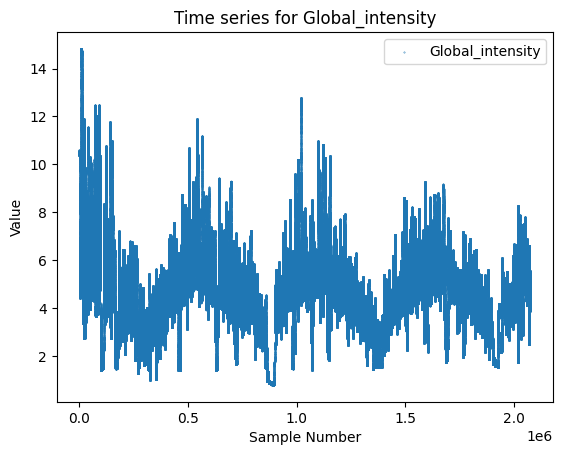

C:\Users\baraky\PycharmProjects\Data_science_lab2_homework2_solution\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


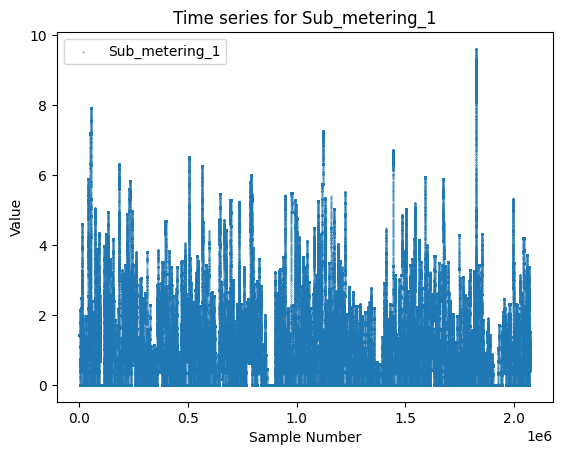

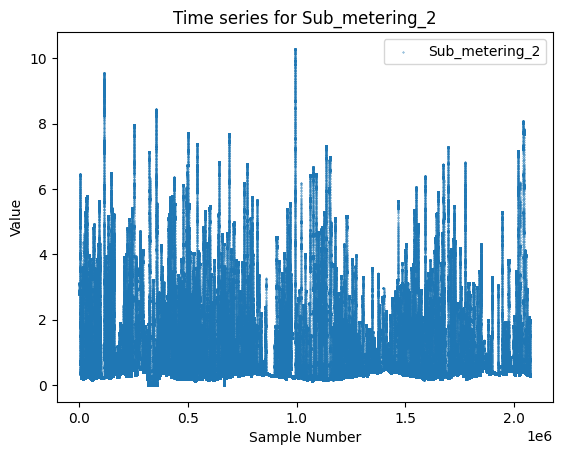

C:\Users\baraky\PycharmProjects\Data_science_lab2_homework2_solution\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


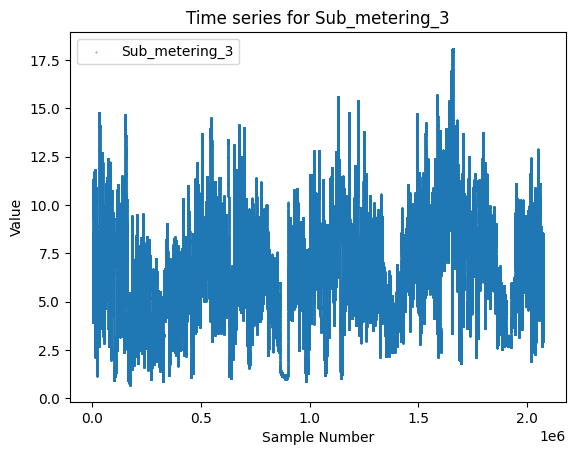

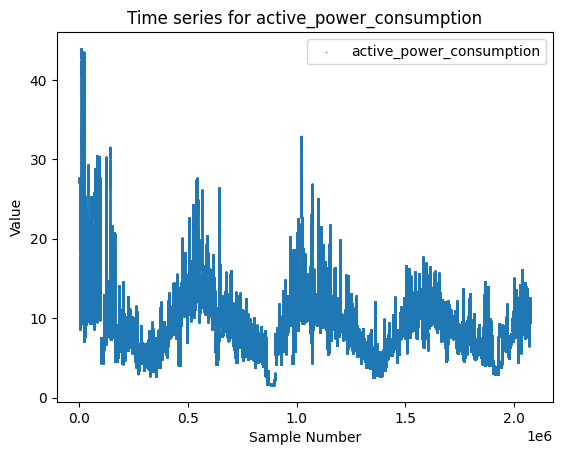

In [13]:
# Plot the time series with missing data
def visualize_time_trends(data,columns_to_omit,window):
    for column in data.columns:
        if column not in columns_to_omit:
            plt.figure()
            plt.scatter(data['Date'].index,data[column].astype(float).rolling(window=window).mean(), marker='o', linestyle='-', label=column,s=0.1)
            plt.title(f'Time series for {column}')
            plt.xlabel('Sample Number')
            plt.ylabel('Value')
            plt.legend()
            plt.show()
            
visualize_time_trends(data=original_df_target_with_missing_values, columns_to_omit=['Date','Time'],window=60*24)

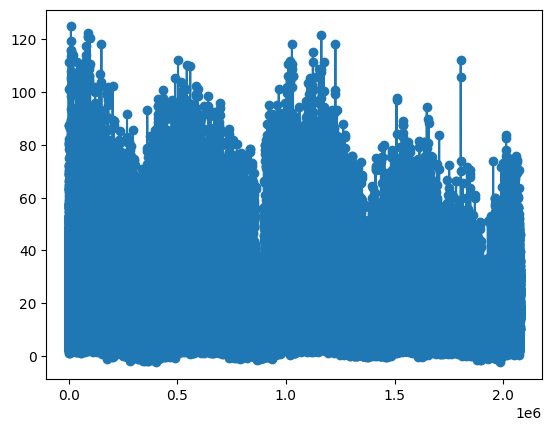

In [14]:
plt.plot(original_df_target_with_missing_values['active_power_consumption'], marker='o', linestyle='-', label='Global_active_power')